In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("imdb-top-rated-movies-user-rated.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             950 non-null    int64  
 1   Title            950 non-null    object 
 2   IMDb Rating      950 non-null    float64
 3   Votes            950 non-null    object 
 4   Poster URL       950 non-null    object 
 5   Video URL        918 non-null    object 
 6   Meta Score       793 non-null    float64
 7   Tags             950 non-null    object 
 8   Director         950 non-null    object 
 9   Description      950 non-null    object 
 10  Writers          950 non-null    object 
 11  Stars            949 non-null    object 
 12  Summary          298 non-null    object 
 13  Worldwide Gross  53 non-null     object 
dtypes: float64(2), int64(1), object(11)
memory usage: 104.0+ KB


In [4]:
df.head()

,Rank,Title,IMDb Rating,Votes,Poster URL,Video URL,Meta Score,Tags,Director,Description,Writers,Stars,Summary,Worldwide Gross
0,1,Once Upon a Time... in Hollywood,7.6,927K,https://www.imdb.com/title/tt7131622/mediaview...,https://imdb-video.media-imdb.com/vi1385741849...,84.0,"""Period Drama, Showbiz Drama, Comedy, Drama""",Quentin Tarantino,"""As Hollywood's Golden Age is winding down dur...",Quentin Tarantino,"""Leonardo DiCaprio, Brad Pitt, Margot Robbie""","""Reviewers say 'Once Upon a Time in Hollywood'...",-
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311K,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"""Action Epic, Adventure Epic, Spy, Action, Adv...",Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,"""Bruce Geller, Christopher McQuarrie, Erik Jen...","""Tom Cruise, Hayley Atwell, Ving Rhames""","""Reviewers say 'Mission: Impossible - Dead Rec...",-
2,3,John Wick: Chapter 4,7.6,392K,https://www.imdb.com/title/tt10366206/mediavie...,https://imdb-video.media-imdb.com/vi289916185/...,78.0,"""Action Epic, Gun Fu, One,Person Army Action, ...",Chad Stahelski,"""John Wick uncovers a path to defeating The Hi...","""Shay Hatten, Michael Finch, Derek Kolstad""","""Keanu Reeves, Laurence Fishburne, George Geor...","""Reviewers say 'John Wick: Chapter 4' is laude...",-
3,4,Watchmen,7.6,603K,https://www.imdb.com/title/tt0409459/mediaview...,https://imdb-video.media-imdb.com/vi240565017/...,56.0,"""Dystopian Sci,Fi, Superhero, Action, Drama, M...",Zack Snyder,"""In a version of 1985 where superheroes exist-...","""Dave Gibbons, David Hayter, Alex Tse""","""Jackie Earle Haley, Patrick Wilson, Carla Gug...","""Reviewers say 'Watchmen' is acclaimed for its...",-
4,5,The Fifth Element,7.6,533K,https://www.imdb.com/title/tt0119116/mediaview...,https://imdb-video.media-imdb.com/vi854720793/...,52.0,"""Sci,Fi Epic, Space Sci,Fi, Action, Adventure,...",Luc Besson,"""In the colorful future- a cab driver unwittin...","""Luc Besson, Robert Mark Kamen""","""Bruce Willis, Milla Jovovich, Gary Oldman""",-,-


In [6]:
def map_votes(votes):
    if votes[-1] == 'K':
        return int(float(votes[:-1])*1000)
    elif votes[-1] == 'M':
        return int(float(votes[:-1])*1000000)
    else:
        return int(votes)
df["Votes"] = df["Votes"].map(map_votes)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             950 non-null    int64  
 1   Title            950 non-null    object 
 2   IMDb Rating      950 non-null    float64
 3   Votes            950 non-null    int64  
 4   Poster URL       950 non-null    object 
 5   Video URL        918 non-null    object 
 6   Meta Score       793 non-null    float64
 7   Tags             950 non-null    object 
 8   Director         950 non-null    object 
 9   Description      950 non-null    object 
 10  Writers          950 non-null    object 
 11  Stars            949 non-null    object 
 12  Summary          298 non-null    object 
 13  Worldwide Gross  53 non-null     object 
dtypes: float64(2), int64(2), object(10)
memory usage: 104.0+ KB


Text(0.5, 1.0, 'Distribution of IMDb Ratings for Romance Movies')

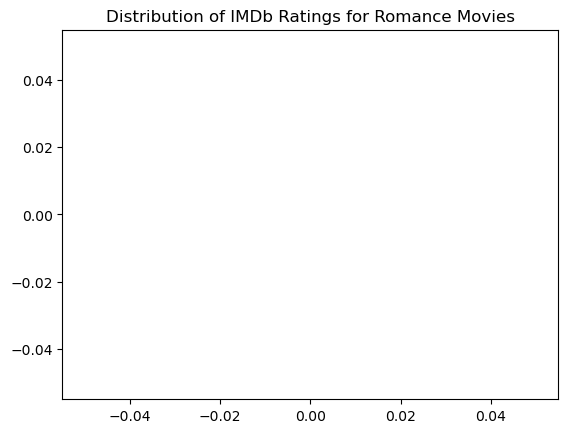

In [ ]:
rating = df[(df['Tags'].apply(lambda x: 'Romance' in x.split(', ')))].sort_values(by="Rank")["Votes"]
sns.kdeplot(rating, fill=True)
plt.title("Distribution of IMDb Ratings for Romance Movies")

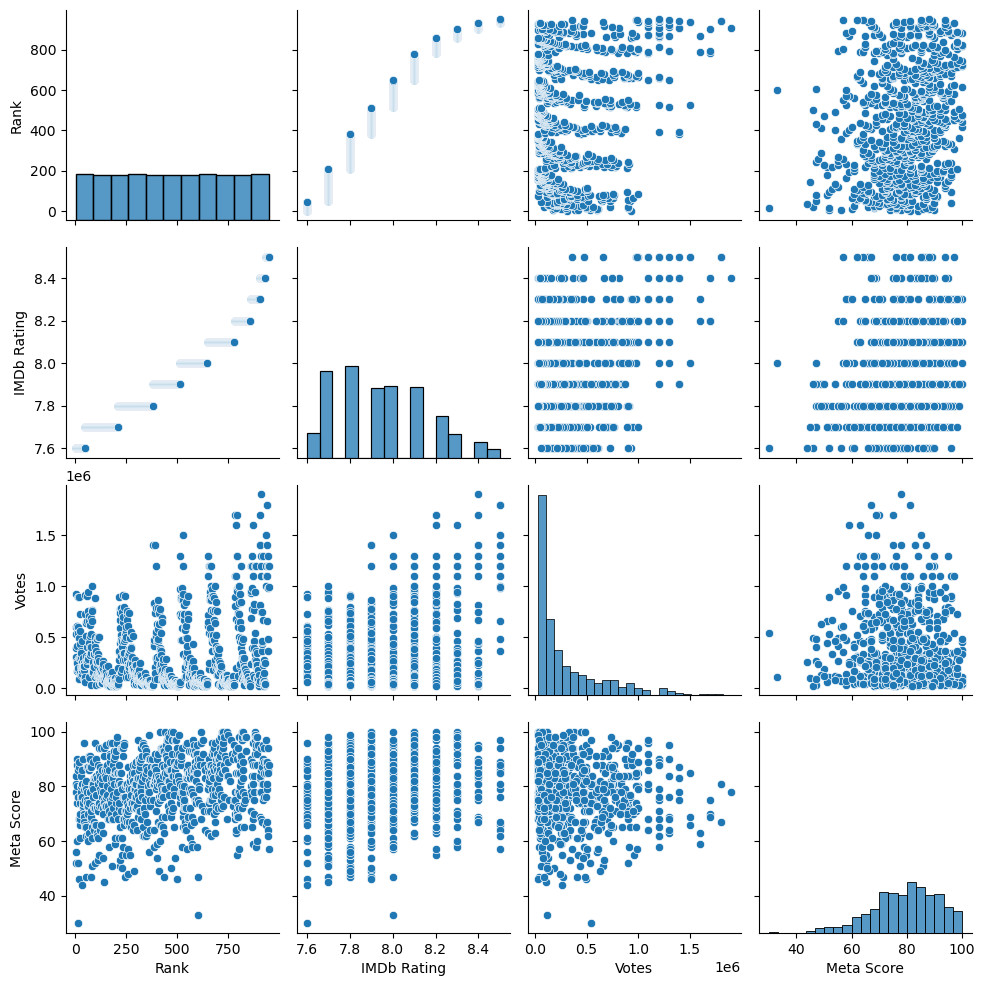

In [9]:
df_useful = df[["Rank","IMDb Rating", "Votes", "Meta Score"]]
sns.pairplot(df_useful)

<Axes: >

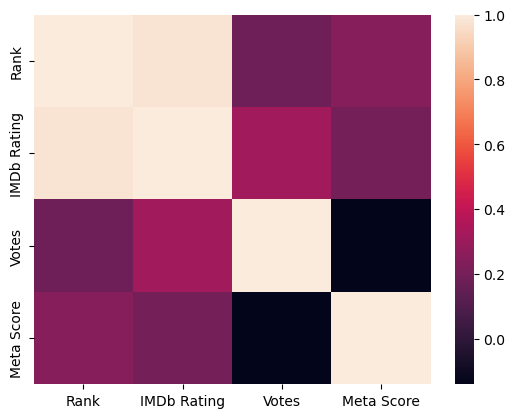

In [10]:
sns.heatmap(df_useful.corr())

In [11]:
df[df["Director"]=="Christopher Nolan"].sort_values("Votes")

,Rank,Title,IMDb Rating,Votes,Poster URL,Video URL,Meta Score,Tags,Director,Description,Writers,Stars,Summary,Worldwide Gross
222,223,Dunkirk,7.8,784000,https://www.imdb.com/title/tt5013056/mediaview...,https://imdb-video.media-imdb.com/vi3402283289...,94.0,"Action Epic, Epic, Historical Epic, Period Dra...",Christopher Nolan,Allied soldiers from Belgium- the British Comm...,Christopher Nolan,"Fionn Whitehead, Barry Keoghan, Mark Rylance",NaN,NaN
859,860,Oppenheimer,8.3,935000,https://www.imdb.com/title/tt15398776/mediavie...,https://imdb-video.media-imdb.com/vi2053751833...,90.0,"Docudrama, Epic, Historical Epic, Period Drama...",Christopher Nolan,A dramatization of the life story of J. Robert...,"Christopher Nolan, Kai Bird, Martin Sherwin","Cillian Murphy, Emily Blunt, Matt Damon",Reviewers say 'Oppenheimer' by Christopher Nol...,NaN
906,907,Memento,8.4,1400000,https://www.imdb.com/title/tt0209144/mediaview...,https://imdb-video.media-imdb.com/vi3220356889...,83.0,"Psychological Thriller, Suspense Mystery, Dram...",Christopher Nolan,A former insurance investigator who now suffer...,"Christopher Nolan, Jonathan Nolan","Guy Pearce, Carrie,Anne Moss, Joe Pantoliano",Reviewers say 'Memento' is acclaimed for its i...,NaN
935,936,The Prestige,8.5,1500000,https://www.imdb.com/title/tt0482571/mediaview...,https://imdb-video.media-imdb.com/vi2885334553...,66.0,"Period Drama, Steampunk, Tragedy, Drama, Myste...",Christopher Nolan,Rival 19th-century magicians engage in a bitte...,"Jonathan Nolan, Christopher Nolan, Christopher...","Christian Bale, Hugh Jackman, Scarlett Johansson",Reviewers say 'The Prestige' is acclaimed for ...,NaN
792,793,Batman Begins,8.2,1700000,https://www.imdb.com/title/tt0372784/mediaview...,https://imdb-video.media-imdb.com/vi362988313/...,70.0,"Action Epic, Epic, Superhero, Tragedy, Action,...",Christopher Nolan,After witnessing his parents' death- billionai...,"Bob Kane, David S. Goyer, Christopher Nolan","Christian Bale, Michael Caine, Ken Watanabe",Reviewers say 'Batman Begins' is acclaimed for...,NaN
908,909,The Dark Knight Rises,8.4,1900000,https://www.imdb.com/title/tt1345836/mediaview...,https://imdb-video.media-imdb.com/vi144884505/...,78.0,"Action Epic, Epic, Superhero, Action, Crime, D...",Christopher Nolan,Bane- an imposing terrorist- attacks Gotham Ci...,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Tom Hardy, Anne Hathaway",Reviewers say 'The Dark Knight Rises' is a div...,NaN


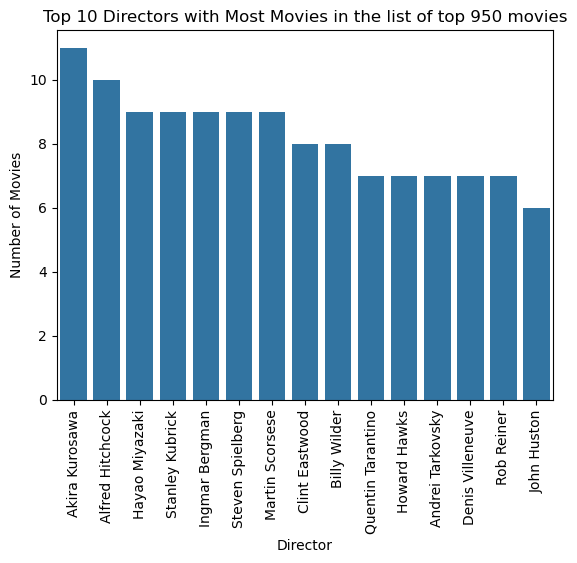

In [12]:
top_directors = df.groupby('Director').size().sort_values(ascending=False).head(15)
top_directors = top_directors.reset_index()
top_directors.columns = ['Director', 'Number of Movies']
sns.barplot(x='Director',y='Number of Movies', data=top_directors)
plt.xticks(rotation=90)
plt.title("Top 10 Directors with Most Movies in the list of top 950 movies")
plt.show()

In [13]:
df["Stars"] = df["Stars"].astype(str).map(lambda x:x.split(", "))



In [14]:
df["Writers"] = df["Writers"].astype(str).map(lambda x:x.split(", "))

In [15]:
df["Tags"] = df["Tags"].astype(str).map(lambda x:x.split(", "))

In [ ]:
df_genre = df.explode("Tags")

In [17]:
df_genre["Tags"]=df_genre["Tags"].str.rstrip('"')
df_genre["Tags"]=df_genre["Tags"].str.lstrip('"')

In [18]:
top_genre = df_genre.groupby("Tags")["IMDb Rating"].mean()
top_genre = top_genre.reset_index()
top_genre.columns = ["Genre","Mean_IMDb_Rating"]
#top_genre["Mean_IMDb_Rating"] = top_genre["Mean_IMDb_Rating"]
top_genre

,Genre,Mean_IMDb_Rating
0,Action,7.937427
1,Action Epic,7.980435
2,Adult Animation,7.912000
3,Adventure,7.942529
4,Adventure Epic,7.975610
...,...,...
157,Whodunnit,7.900000
158,Witch Horror,7.800000
159,Workplace Drama,7.935714
160,Wuxia,7.775000


In [19]:
#df["Tags"] = df["Tags"].astype(str).map(lambda x:x.split(", "))
#df_exploded = df_exploded.explode("Tags")
#df.head()

In [20]:
#df_exploded.head()

In [21]:
df_stars = df.explode("Stars")
df_stars["Stars"] = df_stars["Stars"].str.strip('"')
df_stars.head()

,Rank,Title,IMDb Rating,Votes,Poster URL,Video URL,Meta Score,Tags,Director,Description,Writers,Stars,Summary,Worldwide Gross
0,1,Once Upon a Time... in Hollywood,7.6,927000,https://www.imdb.com/title/tt7131622/mediaview...,https://imdb-video.media-imdb.com/vi1385741849...,84.0,"[""Period Drama, Showbiz Drama, Comedy, Drama""]",Quentin Tarantino,"""As Hollywood's Golden Age is winding down dur...",[Quentin Tarantino],Leonardo DiCaprio,"""Reviewers say 'Once Upon a Time in Hollywood'...",-
0,1,Once Upon a Time... in Hollywood,7.6,927000,https://www.imdb.com/title/tt7131622/mediaview...,https://imdb-video.media-imdb.com/vi1385741849...,84.0,"[""Period Drama, Showbiz Drama, Comedy, Drama""]",Quentin Tarantino,"""As Hollywood's Golden Age is winding down dur...",[Quentin Tarantino],Brad Pitt,"""Reviewers say 'Once Upon a Time in Hollywood'...",-
0,1,Once Upon a Time... in Hollywood,7.6,927000,https://www.imdb.com/title/tt7131622/mediaview...,https://imdb-video.media-imdb.com/vi1385741849...,84.0,"[""Period Drama, Showbiz Drama, Comedy, Drama""]",Quentin Tarantino,"""As Hollywood's Golden Age is winding down dur...",[Quentin Tarantino],Margot Robbie,"""Reviewers say 'Once Upon a Time in Hollywood'...",-
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311000,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"[""Action Epic, Adventure Epic, Spy, Action, Ad...",Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,"[""Bruce Geller, Christopher McQuarrie, Erik Je...",Tom Cruise,"""Reviewers say 'Mission: Impossible - Dead Rec...",-
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311000,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"[""Action Epic, Adventure Epic, Spy, Action, Ad...",Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,"[""Bruce Geller, Christopher McQuarrie, Erik Je...",Hayley Atwell,"""Reviewers say 'Mission: Impossible - Dead Rec...",-


In [22]:
top_stars = df_stars.groupby("Stars")["Title"].count()
top_stars = top_stars.reset_index()
top_stars.columns = ["Stars","Films"]
top_stars.head(20)

,Stars,Films
0,Aadhi,1
1,Aamir Khan,10
2,Aaron Hilmer,1
3,Abbi Jacobson,1
4,Abdolhosein Bagheri,1
5,Abhay Deol,2
6,Abraham Attah,1
7,Achyuth Kumar,1
8,Adam Driver,1
9,Adel Bencherif,1


In [23]:
counts = df_genre["Tags"].value_counts().sort_index()
counts = counts.reset_index()
counts.columns = ["Genre","Count"]
top_genre = pd.merge(left=top_genre,right=counts,how="outer")
top_genre.head()

,Genre,Mean_IMDb_Rating,Count
0,Action,7.937427,171
1,Action Epic,7.980435,46
2,Adult Animation,7.912000,25
3,Adventure,7.942529,174
4,Adventure Epic,7.975610,41


In [24]:
top_genre.sort_values("Mean_IMDb_Rating",ascending=False).head()

,Genre,Mean_IMDb_Rating,Count
117,Shōjo,8.40,1
119,Sketch Comedy,8.20,1
37,Desert Adventure,8.12,10
73,Jukebox Musical,8.10,2
17,Bumbling Detective,8.10,1


In [25]:
top_genre[top_genre["Count"]>=20].sort_values("Mean_IMDb_Rating",ascending=False).head()

,Genre,Mean_IMDb_Rating,Count
89,"One,Person Army Action",8.055172,29
44,Epic,8.047573,103
154,War Epic,8.024138,29
153,War,8.024051,79
16,Buddy Comedy,8.024000,25


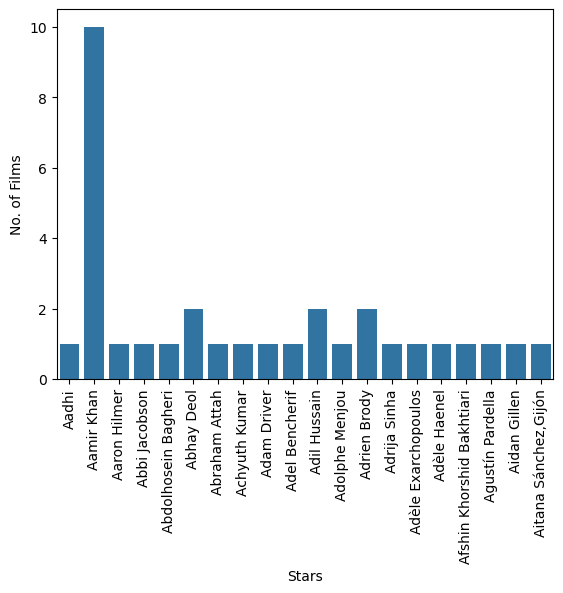

In [26]:
sns.barplot(x="Stars",y="Films",data=top_stars.head(20))
plt.xlabel("Stars")
plt.ylabel("No. of Films")
plt.xticks(rotation=90)
plt.show()

In [27]:
df_meta = df[(~(df["Meta Score"].isna()))&(~(df["IMDb Rating"].isna()))]
score_diff = df_meta["IMDb Rating"]*10 - df_meta["Meta Score"]
score_diff.mean().round(4)

0.1059

In [28]:
score_diff.size

793

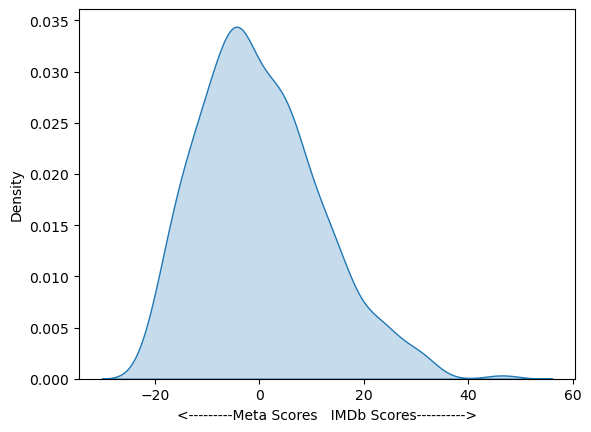

In [29]:
sns.kdeplot(score_diff,fill=True)
plt.xlabel("<---------Meta Scores   IMDb Scores---------->")
plt.show()

Text(0, 0.5, '<---------Meta Scores   IMDb Scores---------->')

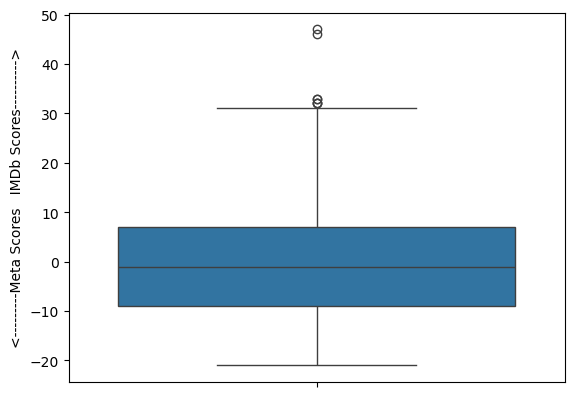

In [30]:
sns.boxplot(score_diff)
plt.ylabel("<---------Meta Scores   IMDb Scores---------->")

In [38]:
df_genre[df_genre["Tags"]=="Crime"].sort_values("IMDb Rating" ,ascending=False)["Title"].head(20)

946             American History X
944         Léon: The Professional
937             The Usual Suspects
934                   The Departed
923                       Maharaja
908          The Dark Knight Rises
922                   High and Low
926    Witness for the Prosecution
929                         Kaithi
931                     Drishyam 2
932                       Drishyam
890          To Kill a Mockingbird
864                           Heat
868                       Scarface
869                          Joker
873                 Reservoir Dogs
878    Once Upon a Time in America
894               Double Indemnity
895                              M
896                     Raatchasan
Name: Title, dtype: object

In [12]:
df[(~df["Worldwide Gross"].isna())&(df["Worldwide Gross"]!='-')]

,Rank,Title,IMDb Rating,Votes,Poster URL,Video URL,Meta Score,Tags,Director,Description,Writers,Stars,Summary,Worldwide Gross
32,33,The Boondock Saints,7.6,259K,https://www.imdb.com/title/tt0144117/mediaview...,https://imdb-video.media-imdb.com/vi915800345/...,44.0,"Dark Comedy, Action, Crime, Thriller",Troy Duffy,Two Irish Catholic brothers become vigilantes ...,Troy Duffy,"Willem Dafoe, Sean Patrick Flanery, Norman Reedus",NaN,$45-050
82,83,The Count of Monte Cristo,7.7,156K,https://www.imdb.com/title/tt0245844/mediaview...,https://imdb-video.media-imdb.com/vi5872665/14...,61.0,"Period Drama, Swashbuckler, Action, Adventure,...",Kevin Reynolds,A young man- falsely imprisoned by his jealous...,"Alexandre Dumas, Jay Wolpert","Jim Caviezel, Guy Pearce, Christopher Adamson",NaN,$54-234-062
133,134,The Name of the Rose,7.7,124K,https://www.imdb.com/title/tt0091605/mediaview...,NaN,54.0,"Period Drama, Whodunnit, Drama, Mystery, Thriller",Jean-Jacques Annaud,An intellectually nonconformist friar investig...,"Umberto Eco, Andrew Birkin, Gérard Brach","Sean Connery, Christian Slater, Helmut Qualtinger",NaN,$7-153-487
313,314,Whisper of the Heart,7.8,80K,https://www.imdb.com/title/tt0113824/mediaview...,https://imdb-video.media-imdb.com/vi825015321/...,75.0,"Anime, Coming,of,Age, Hand,Drawn Animation, Iy...",Yoshifumi Kondô,A love story between a girl who loves reading ...,"Aoi Hiiragi, Hayao Miyazaki","Yoko Honna, Issei Takahashi, Takashi Tachibana",NaN,$4-589-697
378,379,C.R.A.Z.Y.,7.8,35K,https://www.imdb.com/title/tt0401085/mediaview...,NaN,81.0,"Coming,of,Age, Teen Drama, Comedy, Drama",Jean-Marc Vallée,Zachary is confused about his sexuality and is...,"Jean,Marc Vallée, François Boulay","Michel Côté, Marc,André Grondin, Danielle Proulx",NaN,$3-710-169
443,444,Fitzcarraldo,7.9,41K,https://www.imdb.com/title/tt0083946/mediaview...,NaN,NaN,"Adventure Epic, Jungle Adventure, Quest, Adven...",Werner Herzog,The story of Brian Sweeney Fitzgerald- an extr...,Werner Herzog,"Klaus Kinski, Claudia Cardinale, José Lewgoy",NaN,$4-475
478,479,3-Iron,7.9,60K,https://www.imdb.com/title/tt0423866/mediaview...,NaN,72.0,"Feel,Good Romance, Crime, Drama, Romance",Kim Ki-duk,A transient young man breaks into empty homes ...,"Kim Ki,duk","Lee Seung,yun, Jae Hee, Hyuk,ho Kwon",NaN,$241-914
575,576,Monty Python's Life of Brian,8.0,431K,https://www.imdb.com/title/tt0079470/mediaview...,https://imdb-video.media-imdb.com/vi3075522329...,77.0,"Dark Comedy, Parody, Satire, Comedy",Terry Jones,Born on the original Christmas in the stable n...,"Graham Chapman, John Cleese, Terry Gilliam","Graham Chapman, John Cleese, Michael Palin",NaN,$20-206-622
601,602,The Hidden Fortress,8.0,45K,https://www.imdb.com/title/tt0051808/mediaview...,NaN,89.0,"Action Epic, Adventure Epic, Quest, Adventure,...",Akira Kurosawa,Lured by gold- two greedy peasants unknowingly...,"Ryûzô Kikushima, Hideo Oguni, Shinobu Hashimoto","Toshirô Mifune, Misa Uehara, Minoru Chiaki",NaN,$15-942
621,622,Throne of Blood,8.0,59K,https://www.imdb.com/title/tt0050613/mediaview...,NaN,NaN,Drama,Akira Kurosawa,A war-hardened general- egged on by his ambiti...,"Hideo Oguni, Shinobu Hashimoto, Ryûzô Kikushima","Toshirô Mifune, Minoru Chiaki, Isuzu Yamada",NaN,$15-942


In [ ]:
df["Worldwide Gross"] = df["Worldwide Gross"]